# STROKE PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.drop(['id'], axis=1, inplace = True)

In [5]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Amount of Patients in Each Age Group
Ages 0-10:  507
Ages 10-20:  518
Ages 20-30:  545
Ages 30-40:  674
Ages 40-50:  739
Ages 50-60:  823
Ages 60-70:  594
Ages 70-80:  594
Ages 80+:  116


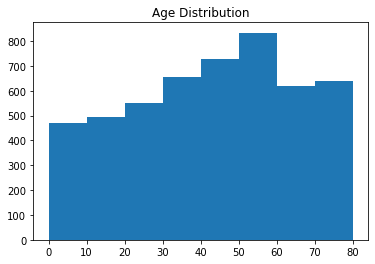

In [6]:
plt.hist(data["age"], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.title("Age Distribution")

data_age_groups = data.copy()
def age_group(age):
    if age >= 0:
        if age <= 10:
            return "0-10"
        elif age <= 20:
            return "10-20"
        elif age <= 30:
            return "20-30"
        elif age <= 40:
            return "30-40"
        elif age <= 50:
            return "40-50"
        elif age <= 60:
            return "50-60"
        elif age <= 70:
            return "60-70"
        elif age <= 80:
            return "70-80"
        else:
            return "80+"
    
data_age_groups["age group"] = data_age_groups['age'].apply(age_group)

print("Amount of Patients in Each Age Group")
print("Ages 0-10: ", data_age_groups["age group"].value_counts()["0-10"])
print("Ages 10-20: ", data_age_groups["age group"].value_counts()["10-20"])
print("Ages 20-30: ", data_age_groups["age group"].value_counts()["20-30"])
print("Ages 30-40: ", data_age_groups["age group"].value_counts()["30-40"])
print("Ages 40-50: ", data_age_groups["age group"].value_counts()["40-50"])
print("Ages 50-60: ", data_age_groups["age group"].value_counts()["50-60"])
print("Ages 60-70: ", data_age_groups["age group"].value_counts()["60-70"])
print("Ages 70-80: ", data_age_groups["age group"].value_counts()["70-80"])
print("Ages 80+: ", data_age_groups["age group"].value_counts()["80+"])

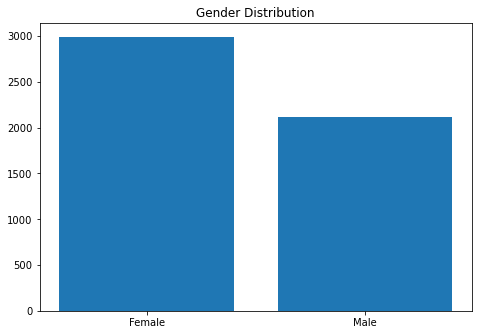

Percentage of Females:  0.5860246623605402
Percentage of Males:  0.41397533763945976


In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ["Female", "Male"]
x = data["gender"].value_counts()['Female']
y = data["gender"].value_counts()['Male']

counts = [x, y]
ax.bar(gender, counts)
plt.title("Gender Distribution")
plt.show()

print("Percentage of Females: ", x /(x+y))
print("Percentage of Males: ", y /(x+y))

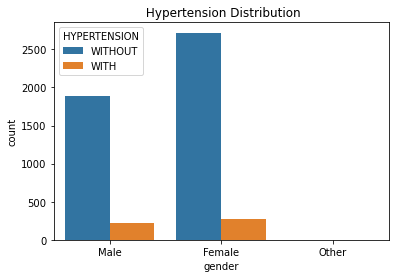

In [8]:
sns.countplot(data=data, x='gender', hue='hypertension').set(title=" Hypertension Distribution")
plt.legend(labels =["WITHOUT","WITH"], title = "HYPERTENSION")

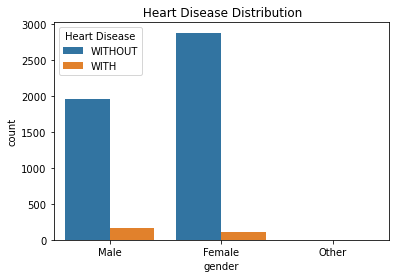

In [9]:
sns.countplot(data=data, x='gender', hue='heart_disease').set(title=" Heart Disease Distribution")
plt.legend(labels =["WITHOUT","WITH"], title = "Heart Disease")

Private:  2925
Self Employed:  819
Government Job:  657
Children:  687
Never Worked:  22


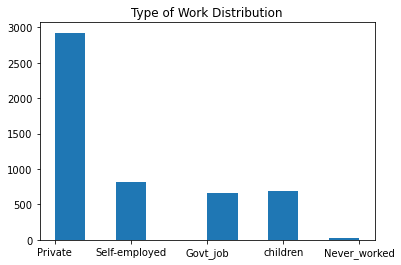

In [10]:
plt.hist(data["work_type"])
plt.title("Type of Work Distribution")

private = data["work_type"].value_counts()["Private"]
self_employed = data["work_type"].value_counts()["Self-employed"]
govt_job = data["work_type"].value_counts()["Govt_job"]
children = data["work_type"].value_counts()["children"]
never_worked = data["work_type"].value_counts()["Never_worked"]

print("Private: ", private)
print("Self Employed: ", self_employed)
print("Government Job: ", govt_job)
print("Children: ", children)
print("Never Worked: ", never_worked)

Text(0.5, 1.0, 'Smoking Status Distribution')

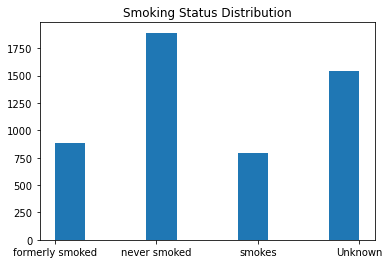

In [11]:
plt.hist(data["smoking_status"])
plt.title("Smoking Status Distribution")

In [12]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [13]:
encoder = preprocessing.LabelEncoder()
data["gender"] = encoder.fit_transform(data["gender"])
data["ever_married"] = encoder.fit_transform(data["ever_married"])
data["Residence_type"] = encoder.fit_transform(data["Residence_type"])

In [14]:
data = pd.get_dummies(data)
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,NaN,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0


In [15]:
new_data = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index=data.index)

new_data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.188073,1.051434,-0.328602,4.185032,0.723884,0.984080,2.706375,0.981345,4.418381,-0.384111,-0.065756,0.864297,-0.436881,-0.394112,-0.658011,2.184951,-0.766774,-0.427313
1,-0.840344,0.786070,-0.328602,-0.238947,0.723884,-1.016178,2.121559,NaN,4.418381,-0.384111,-0.065756,-1.157010,2.288955,-0.394112,-0.658011,-0.457676,1.304165,-0.427313
2,1.188073,1.626390,-0.328602,4.185032,0.723884,-1.016178,-0.005028,0.459269,4.418381,-0.384111,-0.065756,0.864297,-0.436881,-0.394112,-0.658011,-0.457676,1.304165,-0.427313
3,-0.840344,0.255342,-0.328602,-0.238947,0.723884,0.984080,1.437358,0.701207,4.418381,-0.384111,-0.065756,0.864297,-0.436881,-0.394112,-0.658011,-0.457676,-0.766774,2.340204
4,-0.840344,1.582163,3.043196,-0.238947,0.723884,-1.016178,1.501184,-0.623083,4.418381,-0.384111,-0.065756,-1.157010,2.288955,-0.394112,-0.658011,-0.457676,1.304165,-0.427313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,-0.840344,1.626390,3.043196,-0.238947,0.723884,0.984080,-0.494658,NaN,-0.226327,-0.384111,-0.065756,0.864297,-0.436881,-0.394112,-0.658011,-0.457676,1.304165,-0.427313
5106,-0.840344,1.670617,-0.328602,-0.238947,0.723884,0.984080,0.420775,1.414286,-0.226327,-0.384111,-0.065756,-1.157010,2.288955,-0.394112,-0.658011,-0.457676,1.304165,-0.427313
5107,-0.840344,-0.363842,-0.328602,-0.238947,0.723884,-1.016178,-0.511443,0.217332,-0.226327,-0.384111,-0.065756,-1.157010,2.288955,-0.394112,-0.658011,-0.457676,1.304165,-0.427313
5108,1.188073,0.343796,-0.328602,-0.238947,0.723884,-1.016178,1.328257,-0.419346,-0.226327,-0.384111,-0.065756,0.864297,-0.436881,-0.394112,-0.658011,2.184951,-0.766774,-0.427313


In [16]:
x_vars = data.drop(data.columns[np.isnan(data).any()],axis =1)
y = data["stroke"]

smote = SMOTE(random_state = 101)
x_sm, y_sm = smote.fit_resample(x_vars,y)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
lreg = LogisticRegression()
lreg.fit(x_train, y_train)
lreg_preds = lreg.predict(x_test)
accuracy = lreg.score(x_test, y_test)
print("Accuracy: ", accuracy)
print(classification_report(y_test, lreg_preds))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       975
           1       1.00      1.00      1.00       970

    accuracy                           1.00      1945
   macro avg       1.00      1.00      1.00      1945
weighted avg       1.00      1.00      1.00      1945



In [19]:
from sklearn.metrics import classification_report,confusion_matrix

[Text(0, 0.5, 'no_stroke'), Text(0, 1.5, 'stroke')]

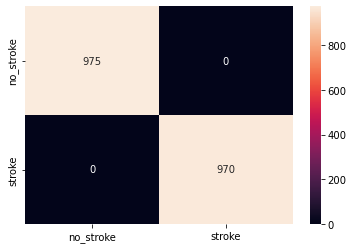

In [21]:
cm = confusion_matrix(y_test,lreg_preds)
ax= plt.subplot()
sns.heatmap(cm,annot = True,fmt ='0.7g',ax=ax)
ax.xaxis.set_ticklabels(['no_stroke','stroke'])
ax.yaxis.set_ticklabels(['no_stroke','stroke'])

In [22]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_preds = rfc.predict(x_test)
accuracy = accuracy_score(y_test, rfc_preds)
print("Accuracy: ", accuracy)

Accuracy:  1.0


[Text(0, 0.5, 'no_stroke'), Text(0, 1.5, 'stroke')]

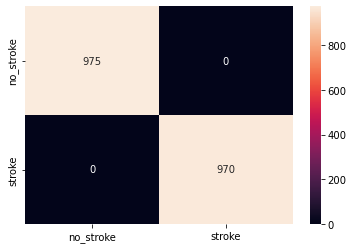

In [26]:
cm = confusion_matrix(y_test,rfc_preds)
ax= plt.subplot()
sns.heatmap(cm,annot = True,fmt ='0.7g',ax=ax)
ax.xaxis.set_ticklabels(['no_stroke','stroke'])
ax.yaxis.set_ticklabels(['no_stroke','stroke'])

In [23]:
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
abc_preds = abc.predict(x_test)
accuracy = accuracy_score(y_test, abc_preds)
print("Accuracy: ", accuracy)

Accuracy:  1.0


[Text(0, 0.5, 'no_stroke'), Text(0, 1.5, 'stroke')]

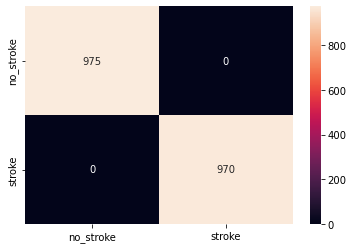

In [27]:
cm = confusion_matrix(y_test,abc_preds)
ax= plt.subplot()
sns.heatmap(cm,annot = True,fmt ='0.7g',ax=ax)
ax.xaxis.set_ticklabels(['no_stroke','stroke'])
ax.yaxis.set_ticklabels(['no_stroke','stroke'])

In [24]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_preds = abc.predict(x_test)
accuracy = accuracy_score(y_test, gbc_preds)
print("Accuracy: ", accuracy)

Accuracy:  1.0


[Text(0, 0.5, 'no_stroke'), Text(0, 1.5, 'stroke')]

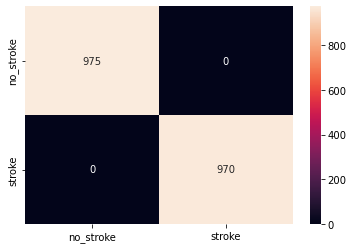

In [28]:
cm = confusion_matrix(y_test,gbc_preds)
ax= plt.subplot()
sns.heatmap(cm,annot = True,fmt ='0.7g',ax=ax)
ax.xaxis.set_ticklabels(['no_stroke','stroke'])
ax.yaxis.set_ticklabels(['no_stroke','stroke'])

In [25]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knn_preds = knn.predict(x_test)
accuracy = accuracy_score(y_test, knn_preds)
print("Accuracy: ", accuracy)

Accuracy:  0.9866323907455012


[Text(0, 0.5, 'no_stroke'), Text(0, 1.5, 'stroke')]

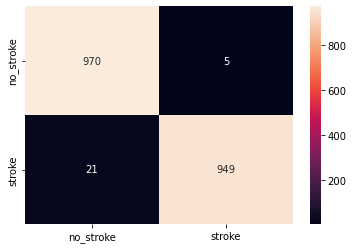

In [29]:
cm = confusion_matrix(y_test,knn_preds)
ax= plt.subplot()
sns.heatmap(cm,annot = True,fmt ='0.7g',ax=ax)
ax.xaxis.set_ticklabels(['no_stroke','stroke'])
ax.yaxis.set_ticklabels(['no_stroke','stroke'])